In [4]:
import torch
from custom_neural_network import NeuralNetwork

In [5]:
model = NeuralNetwork()
model.load_state_dict(torch.load('model_precise.pt'))
model.eval()
model

NeuralNetwork(
  (cnn1): Sequential(
    (0): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(1, 1, kernel_size=(5, 5), stride=(1, 1))
    (4): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Flatten(start_dim=1, end_dim=-1)
    (6): Linear(in_features=16, out_features=120, bias=True)
    (7): ReLU()
    (8): Linear(in_features=120, out_features=84, bias=True)
    (9): ReLU()
    (10): Linear(in_features=84, out_features=10, bias=True)
    (11): LogSoftmax(dim=1)
  )
)

In [ ]:
import netron
x = torch.zeros((1,28,28))
input_names = ['x']
output_names = ['y']
torch.onnx.export(model, x, 'viz_netron.onnx', input_names=input_names, output_names=output_names)
netron.start('viz_netron.onnx')

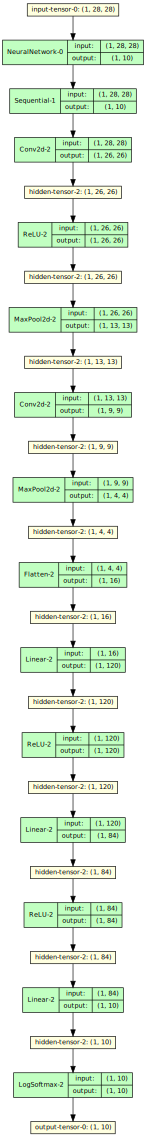

In [13]:
from torchview import draw_graph
batch_size = 1
input_dim = (28, 28)
model_graph = draw_graph(model, input_size=(batch_size,) + input_dim, hide_inner_tensors=False)
model_graph.visual_graph